In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [6]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('results/interactionrecov/InteractionOrderSummary.csv')
# Convert the string representation of the list into an actual list
df['Sparsity by Interaction Order'] = df['Sparsity by Interaction Order'].apply(ast.literal_eval)
df['Ruggedness by Interaction Order'] = df['Ruggedness by Interaction Order'].apply(ast.literal_eval)
df

,Protein,NumPositions,Sparsity,Sparsity by Interaction Order,Ruggedness,Ruggedness by Interaction Order
0,DHFR,3,0.198150,"[0.9649122807017544, 0.6094182825484764, 0.126...",1.402598,"[63.591989818985084, 32.556224510802316, 3.851..."
1,GB1,4,0.445290,"[1.0, 0.9344413665743305, 0.7452981484181368, ...",2.223795,"[20.820700889919504, 43.00528184760371, 29.147..."
2,ParD2,3,0.254157,"[0.9649122807017544, 0.6842105263157895, 0.180...",1.245915,"[80.17004807726202, 15.068405611642977, 4.7615..."
3,ParD3,3,0.264283,"[1.0, 0.7054478301015698, 0.18851144481702872]",1.226292,"[82.62672097821459, 12.117333363780517, 5.2559..."
4,TrpB3A,3,0.777597,"[0.9298245614035088, 0.8070175438596491, 0.771...",2.387637,"[22.023400129768, 17.189504862098616, 60.78709..."
5,TrpB3B,3,0.827728,"[0.9824561403508771, 0.8587257617728532, 0.821...",2.676437,"[8.070509177633626, 16.21524771983919, 75.7142..."
6,TrpB3C,3,0.819352,"[1.0, 0.8550323176361958, 0.8122175244204695]",2.596199,"[12.893232116827319, 14.593601940627924, 72.51..."
7,TrpB3D,3,0.703463,"[0.9298245614035088, 0.8264081255771006, 0.682...",2.169550,"[22.570897534273755, 37.90315744608835, 39.525..."
8,TrpB3E,3,0.778722,"[0.9298245614035088, 0.8393351800554016, 0.767...",2.517893,"[4.617385568665687, 38.975915586028506, 56.406..."
9,TrpB3F,3,0.822728,"[0.9649122807017544, 0.8744228993536473, 0.813...",2.559389,"[11.390266518957812, 21.280584902121717, 67.32..."


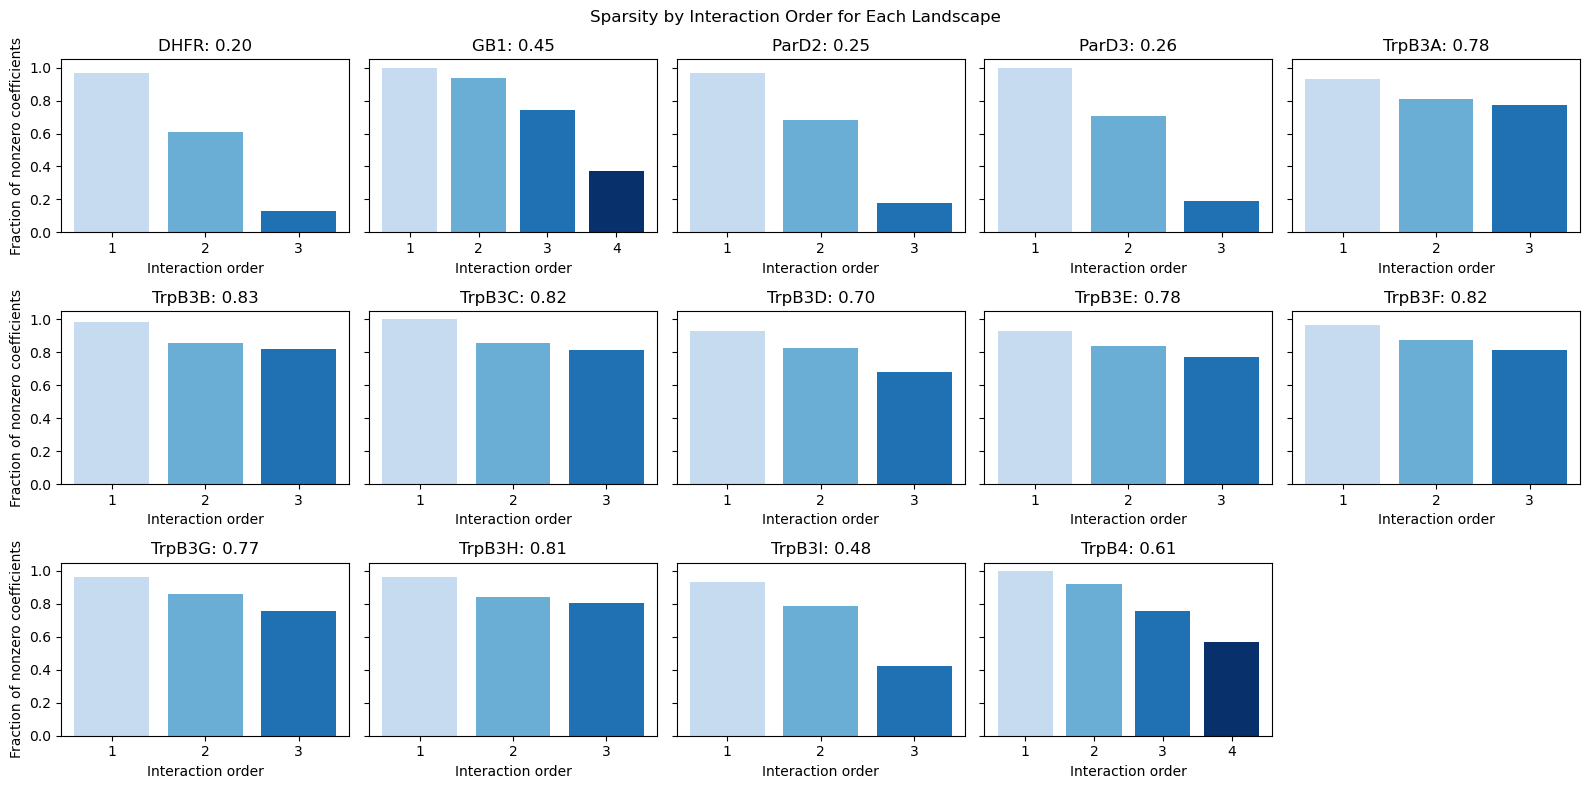

In [26]:
# Create a 5x3 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(16, 8), sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Define a color map
colors = plt.cm.Blues(np.linspace(0, 1, 5))

# Plot each protein's data in its subplot
for l, (ax, (protein, s, sparsity)) in enumerate(zip(axes, zip(df["Protein"], df["Sparsity"], df["Sparsity by Interaction Order"]))):
    x_values = range(1, len(sparsity) + 1)
    ax.bar(x_values, sparsity, color=[colors[i % len(colors)] for i in x_values])
    ax.set_title(f"{protein}: {s:.2f}")
    ax.set_xlabel('Interaction order')

    if l % 5 == 0:
        ax.set_ylabel('Fraction of nonzero coefficients')

# Remove any unused subplots
for ax in axes[len(df):]:
    fig.delaxes(ax)

plt.suptitle('Sparsity by Interaction Order for Each Landscape')
plt.tight_layout()
plt.show()

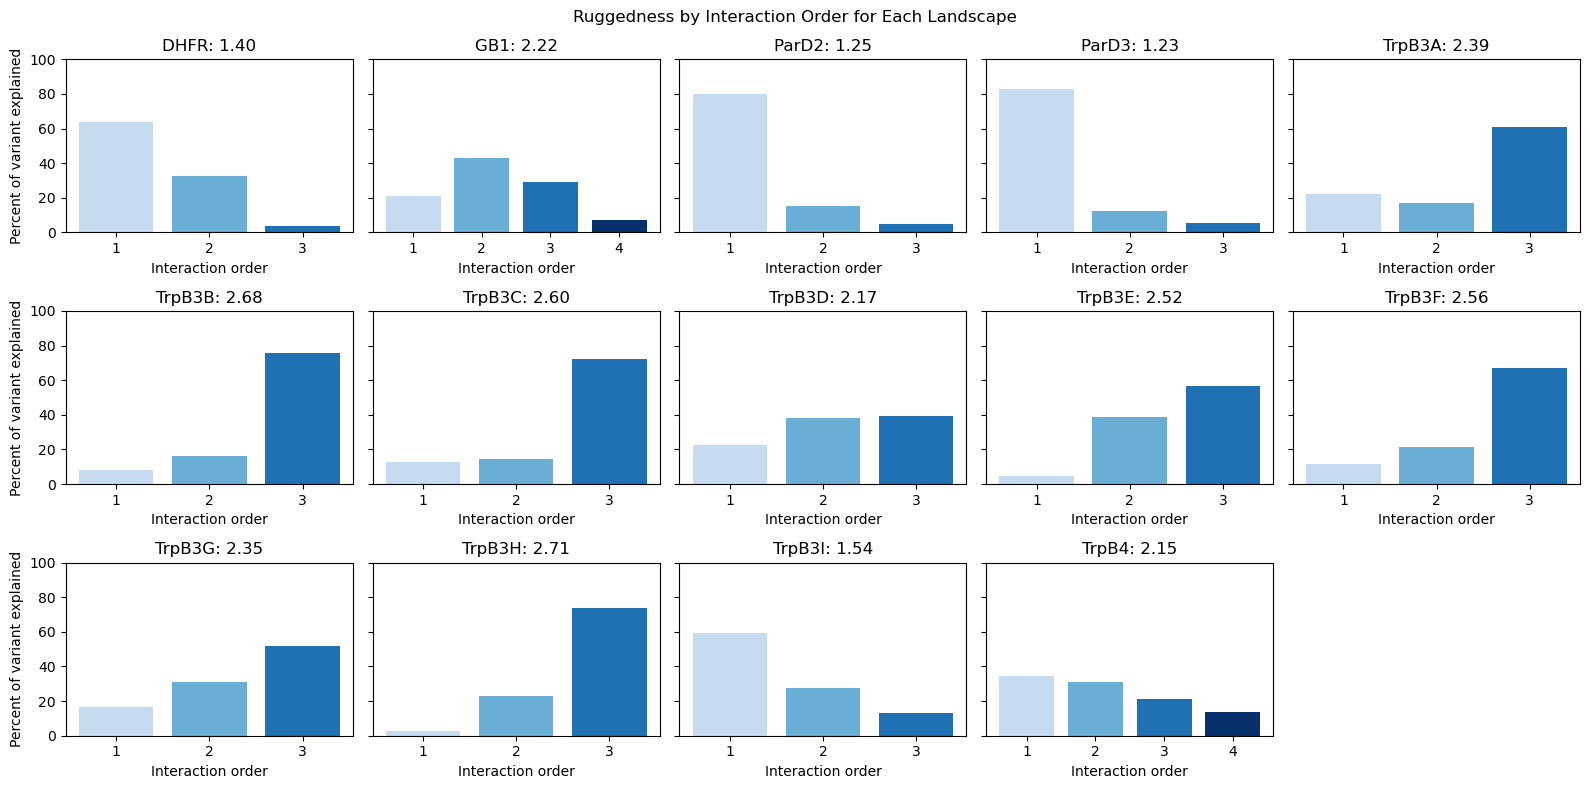

In [28]:
# Create a 5x3 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(16, 8), sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Define a color map
colors = plt.cm.Blues(np.linspace(0, 1, 5))

# Plot each protein's data in its subplot
for l, (ax, (protein, s, sparsity)) in enumerate(zip(axes, zip(df["Protein"], df["Ruggedness"], df["Ruggedness by Interaction Order"]))):
    x_values = range(1, len(sparsity) + 1)
    ax.bar(x_values, sparsity, color=[colors[i % len(colors)] for i in x_values])
    ax.set_title(f"{protein}: {s:.2f}")
    ax.set_xlabel('Interaction order')
    ax.set_ylim(0, 100)

    if l % 5 == 0:
        ax.set_ylabel('Percent of variant explained')

# Remove any unused subplots
for ax in axes[len(df):]:
    fig.delaxes(ax)

plt.suptitle('Ruggedness by Interaction Order for Each Landscape')
plt.tight_layout()
plt.show()